depth | train accuracy | Test accuracy
2 0.766637856525497 0.8003502626970228
3 0.7865168539325843 0.8021015761821366
4 0.8340535868625756 0.8423817863397548
5 0.8634399308556612 0.8704028021015762
6 0.9066551426101987 0.8949211908931699
7 0.9377700950734659 0.9159369527145359
8 0.9593777009507347 0.9334500875656743
9 0.9749351771823682 0.9457092819614711
10 0.9870354364736387 0.9474605954465849
11 0.996542783059637 0.9457092819614711


C:\Users\Logan\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


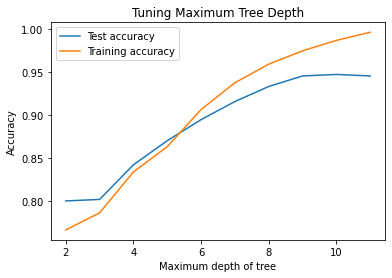

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.model_selection import train_test_split

data = 'car_evaluation.csv'
df = pd.read_csv(data, header=None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

def make_tree(depth):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    y_pred_gini = model.predict(X_test)
    y_pred_train_gini = model.predict(X_train)
    return accuracy_score(y_train, y_pred_train_gini), accuracy_score(y_test, y_pred_gini)

depths = list(range(2,12))
test_accuracy = []
train_accuracy = []

print('depth | train accuracy | Test accuracy')
for x in depths:
    train_accuracy.append(make_tree(x)[0])
    test_accuracy.append(make_tree(x)[1])
    print(x, train_accuracy[x-2], test_accuracy[x-2])
    
plt.plot(depths,test_accuracy, label="Test accuracy")
plt.plot(depths,train_accuracy, label='Training accuracy')
plt.xlabel("Maximum depth of tree")
plt.ylabel("Accuracy")
plt.title("Tuning Maximum Tree Depth")
plt.legend()